In [1]:
from Datapipeline import Datapipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, StackingClassifier

In [3]:
stacking_RF_GNB_KNN_LR = StackingClassifier(
    estimators= [
        ("Random Forest", RandomForestClassifier(random_state=42)),
        ("Naive Bayes", GaussianNB()),
        ("KNN", KNeighborsClassifier(n_neighbors=5, weights = 'distance'))
        ], 
    final_estimator=SGDClassifier(loss='log_loss', penalty='elasticnet', random_state=42)
)

stacking_RF_GNB_LR = StackingClassifier(
    estimators= [
        ("Random Forest", RandomForestClassifier(random_state=42)),
        ("Naive Bayes", GaussianNB())
        ], 
    final_estimator=SGDClassifier(loss='log_loss', penalty='elasticnet', random_state=42)
)

stacking_KNN_GNB_LR = StackingClassifier(
    estimators= [
        ("Naive Bayes", GaussianNB()),
        ("KNN", KNeighborsClassifier(n_neighbors=5, weights = 'distance'))  
        ], 
    final_estimator=SGDClassifier(loss='log_loss', penalty='elasticnet', random_state=42)
)

stacking_RF_KNN_LR = StackingClassifier(
    estimators= [
        ("Random Forest", RandomForestClassifier(random_state=42)),
        ("KNN", KNeighborsClassifier(n_neighbors=5, weights = 'distance'))
        ], 
    final_estimator=SGDClassifier(loss='log_loss', penalty='elasticnet', random_state=42)
)

In [5]:
models = [
    DecisionTreeClassifier(random_state=42), 
    RandomForestClassifier(random_state=42), 
    SGDClassifier(loss='log_loss', penalty='elasticnet', random_state=42), 
    GaussianNB(), 
    KNeighborsClassifier(n_neighbors=5, weights = 'distance'), 
    stacking_RF_GNB_KNN_LR, 
    stacking_RF_GNB_LR, 
    stacking_KNN_GNB_LR,
    stacking_RF_KNN_LR
]

In [6]:
df = pd.read_csv('../train.csv')
labels = df['Churn']
df = df.drop('Churn', axis='columns')

In [7]:
pl = Datapipeline()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [8]:
scores_acc = []
scores_pre = []
scores_recall = []
scores_f1 = []

for model in models:
    print(model)
    pl = Datapipeline()
    pl.steps.append(['classifier', model])
    acc_score = cross_val_score(pl, df, labels, scoring='accuracy', cv=skf)
    scores_acc.append(acc_score)

    pre_score = cross_val_score(pl, df, labels, scoring='precision', cv=skf)
    scores_pre.append(pre_score)

    recall_score = cross_val_score(pl, df, labels, scoring='recall', cv=skf)
    scores_recall.append(recall_score)

    f1_score = cross_val_score(pl, df, labels, scoring='f1', cv=skf)
    scores_f1.append(f1_score)

DecisionTreeClassifier(random_state=42)
RandomForestClassifier(random_state=42)
SGDClassifier(loss='log_loss', penalty='elasticnet', random_state=42)
GaussianNB()
KNeighborsClassifier(weights='distance')
StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(random_state=42)),
                               ('Naive Bayes', GaussianNB()),
                               ('KNN',
                                KNeighborsClassifier(weights='distance'))],
                   final_estimator=SGDClassifier(loss='log_loss',
                                                 penalty='elasticnet',
                                                 random_state=42))
StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(random_state=42)),
                               ('Naive Bayes', GaussianNB())],
                   final_estimator=SGDClassifier(loss='log_loss',
                                        

In [9]:
model_names = [
    'DecisionTreeClassifier', 
    'RandomForestClassifier', 
    'LogisticRegression', 
    'Naive Bayes',
    'KNN', 
    'stacking_RF_GNB_KNN_LR', 
    'stacking_RF_GNB_LR', 
    'stacking_KNN_GNB_LR',
    'stacking_RF_KNN_LR'
]

In [10]:
def box_plot_score(score, score_name, model_names = model_names):
    plt.figure(figsize=(8, 4))
    plt.boxplot(score)
    plt.xlabel('Model', fontsize=5)
    plt.ylabel('Score', fontsize=5)
    plt.xticks(np.arange(len(model_names))+1, model_names, rotation=45, fontsize=8)
    plt.title(score_name, fontsize=5)

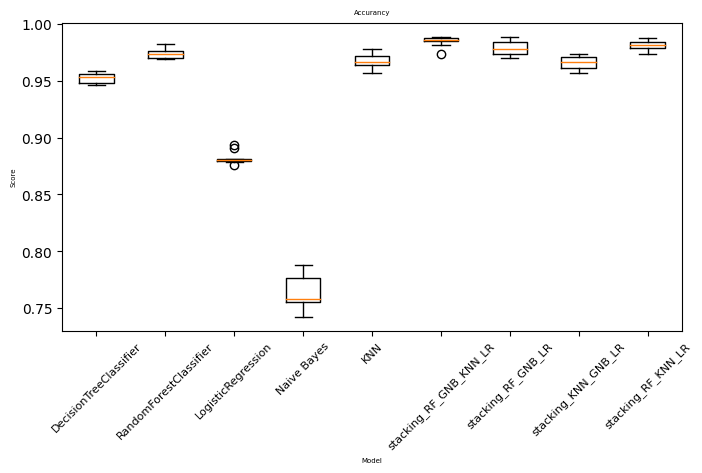

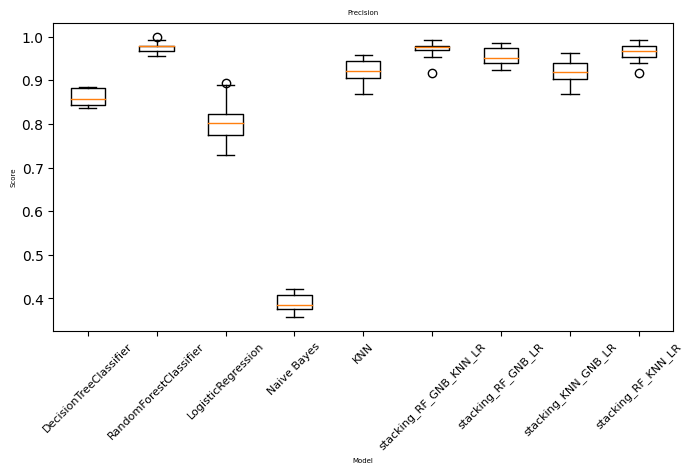

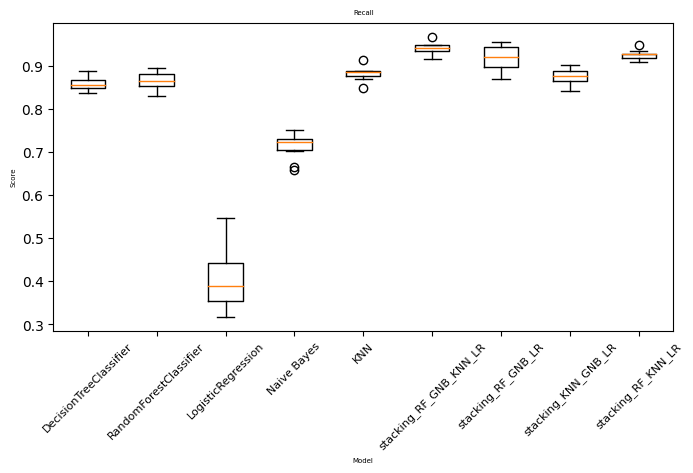

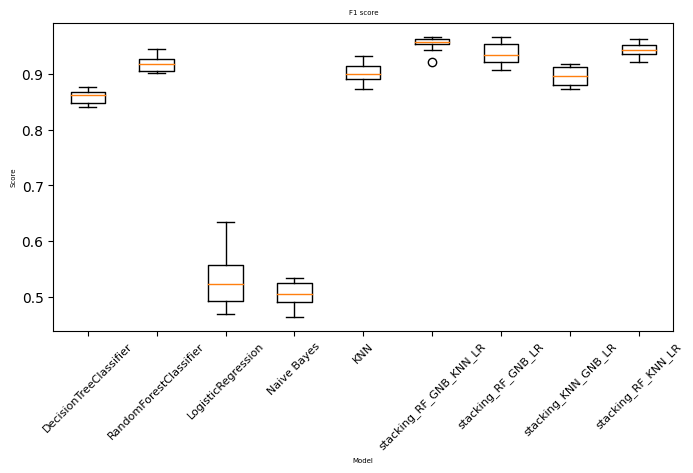

In [11]:
box_plot_score(scores_acc, "Accurancy")
box_plot_score(scores_pre, "Precision")
box_plot_score(scores_recall, "Recall")
box_plot_score(scores_f1, "F1 score")

In [12]:
for i in range(len(model_names)):
    print(model_names[i])
    print("\tAcc: {:.4f}\tPre: {:.4f}\tRecall: {:.4f}\tF1: {:.4f}".format(np.mean(scores_acc[i]), np.mean(scores_pre[i]), np.mean(scores_recall[i]), np.mean(scores_f1[i])))
    

DecisionTreeClassifier
	Acc: 0.9525	Pre: 0.8604	Recall: 0.8576	F1: 0.8588
RandomForestClassifier
	Acc: 0.9738	Pre: 0.9764	Recall: 0.8655	F1: 0.9174
LogisticRegression
	Acc: 0.8820	Pre: 0.8062	Recall: 0.4014	F1: 0.5307
Naive Bayes
	Acc: 0.7637	Pre: 0.3904	Recall: 0.7126	F1: 0.5042
KNN
	Acc: 0.9671	Pre: 0.9202	Recall: 0.8820	F1: 0.9005
stacking_RF_GNB_KNN_LR
	Acc: 0.9849	Pre: 0.9699	Recall: 0.9400	F1: 0.9546
stacking_RF_GNB_LR
	Acc: 0.9788	Pre: 0.9551	Recall: 0.9176	F1: 0.9357
stacking_KNN_GNB_LR
	Acc: 0.9657	Pre: 0.9180	Recall: 0.8754	F1: 0.8959
stacking_RF_KNN_LR
	Acc: 0.9816	Pre: 0.9642	Recall: 0.9255	F1: 0.9443
